In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
from functools import partial

In [2]:
train = pd.read_csv('data/train.csv')
store = pd.read_csv('data/store.csv')
test = pd.read_csv('data/test.csv')

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# store

In [21]:
store.info()
store.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [29]:
store.iloc[1].PromoInterval

'Jan,Apr,Jul,Oct'

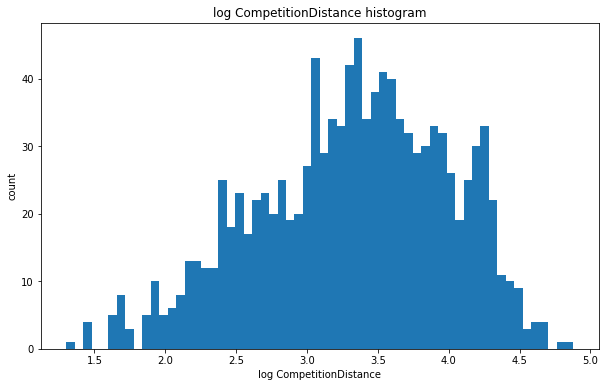

In [10]:
plt.figure(figsize=(10, 6))
plt.xlabel('log CompetitionDistance')
plt.ylabel('count')
plt.title('log CompetitionDistance histogram')
plt.hist(np.log10(store.CompetitionDistance), bins=60)
plt.show()

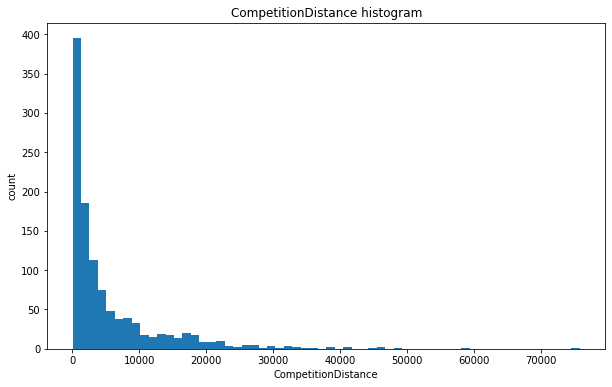

In [7]:
plt.figure(figsize=(10, 6))
plt.xlabel('CompetitionDistance')
plt.ylabel('count')
plt.title('CompetitionDistance histogram')
plt.hist(store.CompetitionDistance, bins=60)
plt.show()

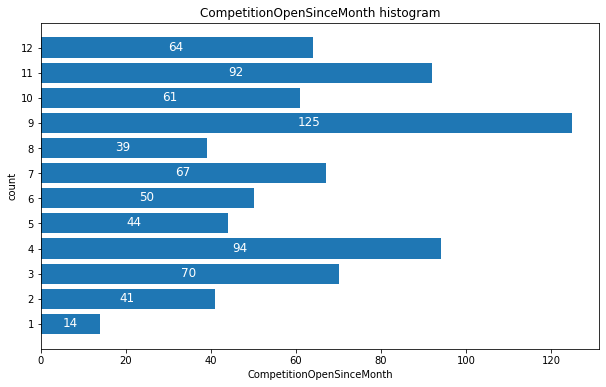

In [69]:
ser = store.CompetitionOpenSinceMonth.value_counts()
plt.figure(figsize=(10, 6))
plt.barh(ser.index.astype('int'), width=ser.values)
plt.yticks(ser.index.astype('int'), ser.index.astype('int'))
for index in ser.index:
    plt.text(ser[index] / 2 - 2, index - 0.1, ser[index], color='white', fontsize='large')

plt.xlabel('CompetitionOpenSinceMonth')
plt.ylabel('count')
plt.title('CompetitionOpenSinceMonth histogram')
plt.show()

<AxesSubplot:>

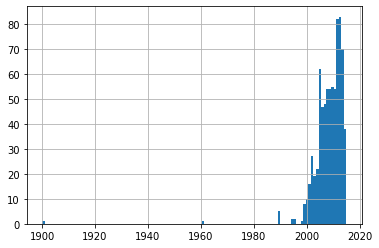

In [92]:
store.CompetitionOpenSinceYear.hist(bins=120)

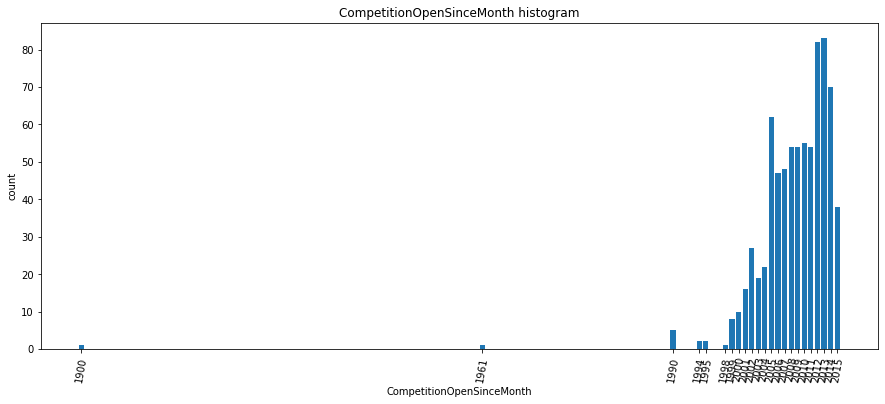

In [96]:
ser = store.CompetitionOpenSinceYear.value_counts()#.drop(1900)#.drop([1900, 1961])
plt.figure(figsize=(15, 6))
plt.bar(ser.index.astype('int'), height=ser.values)
plt.xticks(ser.index.astype('int'), ser.index.astype('int'), rotation=80)
# for index in ser.index:
#     plt.text(index - 0.1, ser[index] / 2 - 2, ser[index], color='white', fontsize='large')

plt.xlabel('CompetitionOpenSinceMonth')
plt.ylabel('count')
plt.title('CompetitionOpenSinceMonth histogram')
plt.show()

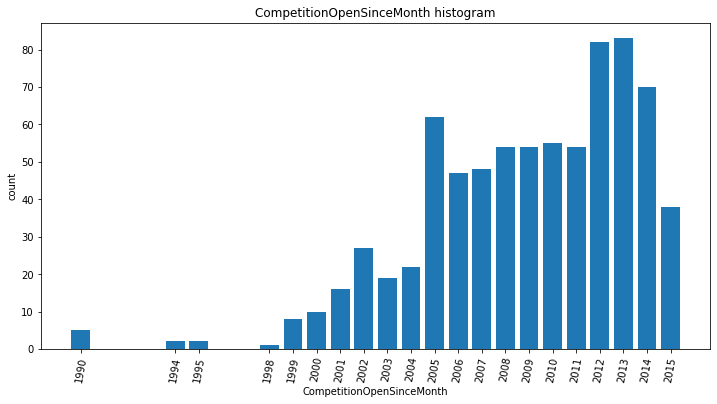

In [98]:
ser = store.CompetitionOpenSinceYear.value_counts().drop([1900, 1961])
plt.figure(figsize=(12, 6))
plt.bar(ser.index.astype('int'), height=ser.values)
plt.xticks(ser.index.astype('int'), ser.index.astype('int'), rotation=80)
# for index in ser.index:
#     plt.text(index - 0.1, ser[index] / 2 - 2, ser[index], color='white', fontsize='large')

plt.xlabel('CompetitionOpenSinceMonth')
plt.ylabel('count')
plt.title('CompetitionOpenSinceMonth histogram')
plt.show()

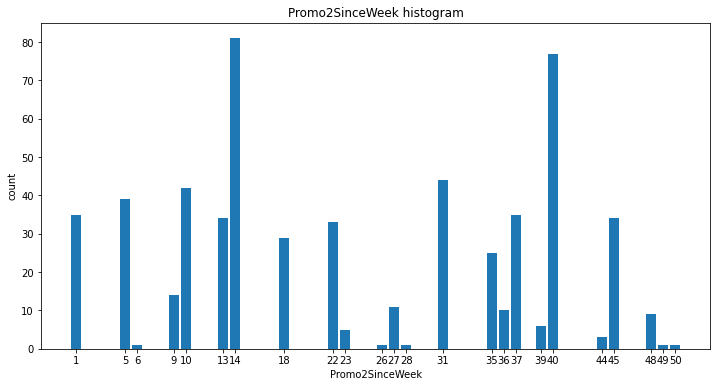

In [103]:
ser = store.Promo2SinceWeek.value_counts()
plt.figure(figsize=(12, 6))
plt.bar(ser.index.astype('int'), height=ser.values)
plt.xticks(ser.index.astype('int'), ser.index.astype('int'))
# for index in ser.index:
#     plt.text(index - 0.1, ser[index] / 2 - 2, ser[index], color='white', fontsize='large')

plt.xlabel('Promo2SinceWeek')
plt.ylabel('count')
plt.title('Promo2SinceWeek histogram')
plt.show()

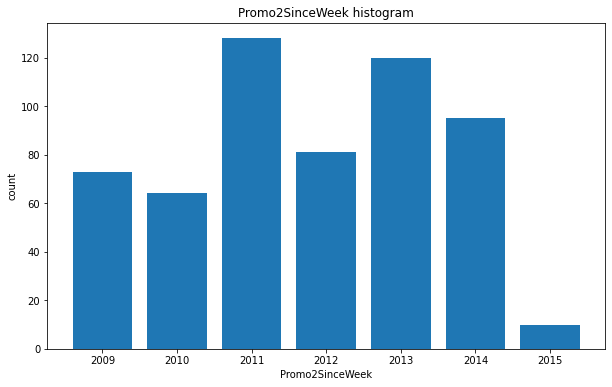

In [105]:
ser = store.Promo2SinceYear.value_counts()
plt.figure(figsize=(10, 6))
plt.bar(ser.index.astype('int'), height=ser.values)
plt.xticks(ser.index.astype('int'), ser.index.astype('int'))

plt.xlabel('Promo2SinceWeek')
plt.ylabel('count')
plt.title('Promo2SinceWeek histogram')
plt.show()

The ***store*** table contains 10 columns.  
___
**Store** (*unique*)

The identifier of store. Ranges from 1 to 1115.
___
**StoreType**

The type of store. Its values are 'a', 'b', 'c' and 'd'. The histogram of values:  
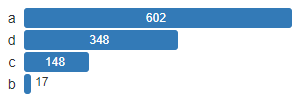  
This feature is categorical and its values are not numeric. So when training models it must be transformed to numeric features e.g. using one-hot encoder.
___
**Assortment**

The type of assortment provided by the store. Its values are 'a', 'b' and 'c'. The histogram of values:  
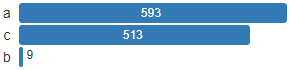  
This feature is also categorical and takes non-numeric values. So it must be transformed to numeric features e.g. using one-hot encoder.
___
**CompetitionDistance**

The distance from the store to the nearest competitor store in meters. There are 3 (or 0.3%) missing values. The distribution of this feature:  
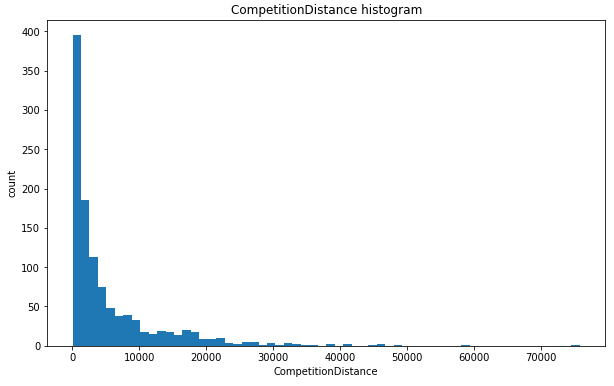  
The distribution is similar to lognormal. Let's take a logarithm of this feature and show the distribution:  
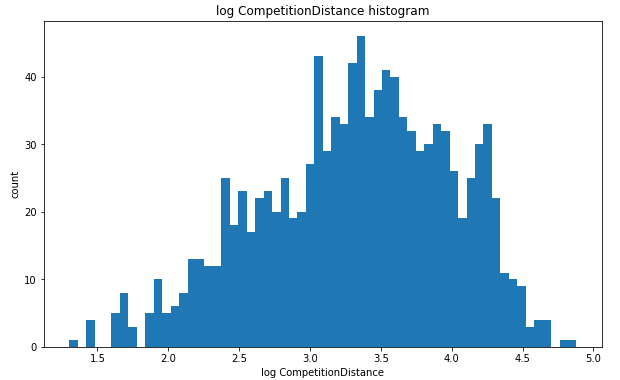  
It is a bit similar to normal distribution. It is a good information for linear regression because it works with such features better.
___
**CompetitionOpenSinceMonth**

The month of the first opening of the nearest competitor store. There are 354 (or 31.7%) missing values. The distribution of this feature:  
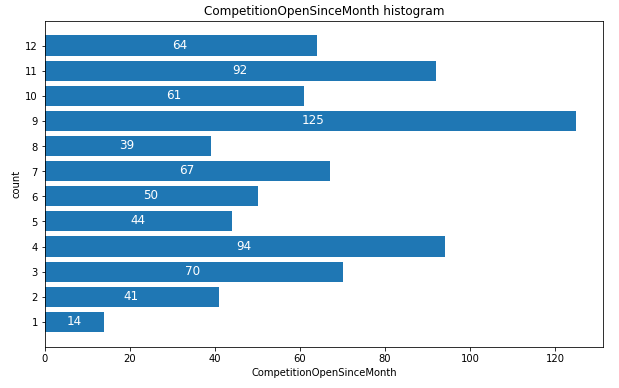  
___
**CompetitionOpenSinceYear**

The year of the first opening of the nearest competitor store. There are 354 (or 31.7%) missing values. The distribution of this feature:  

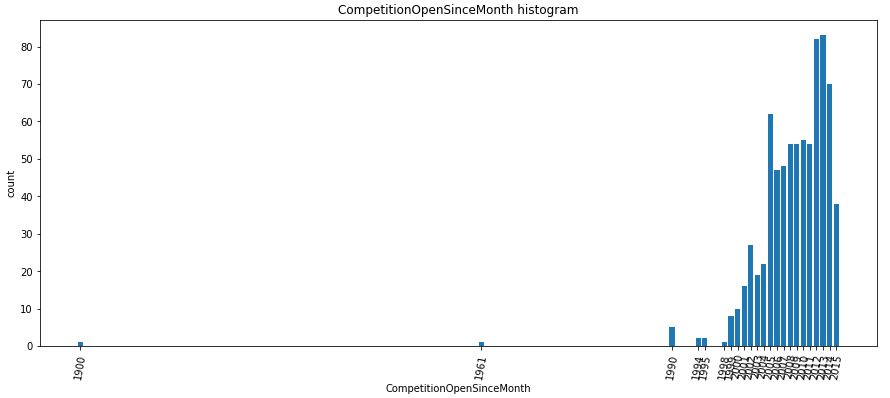  
As you can see there are two outliers - 1900 and 1961. The distribution without them:  

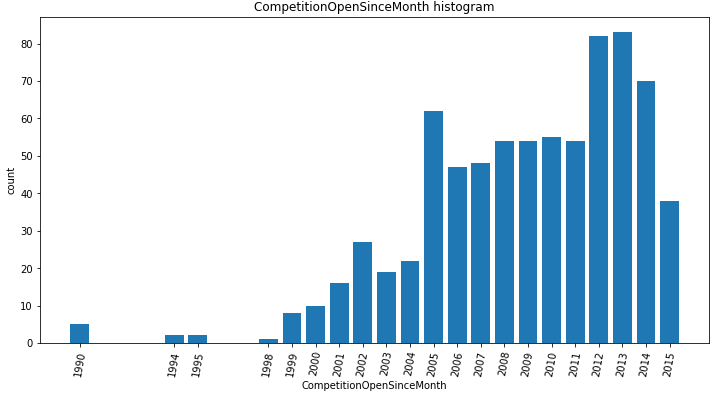  
So the most of competitor stores were opened during the last 15 years. The years 1900 and 1961 are the obvious outliers. They are errors because the Rossmann was founded in 197?. So these values must be changed e.g. to mean value or to the year of foundation.
___
**Promo2**

Indicates whether the store is participating in promotion "Promo2" or not. Its values are 0 and 1. The histogram of values:  
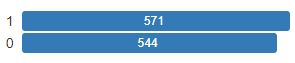  
___
**Promo2SinceWeek**

The week of start of the participating in "Promo2". If **Promo2** equals 0, this feature is missed. There are 544 missing values. The histogram of values:  
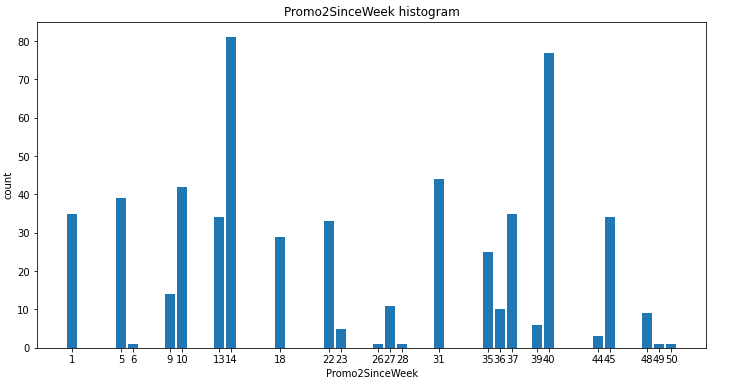  
___
**Promo2SinceYear**

The week of start of the participating in "Promo2". If **Promo2** equals 0, this feature is missed. There are 544 missing values. The histogram of values:  
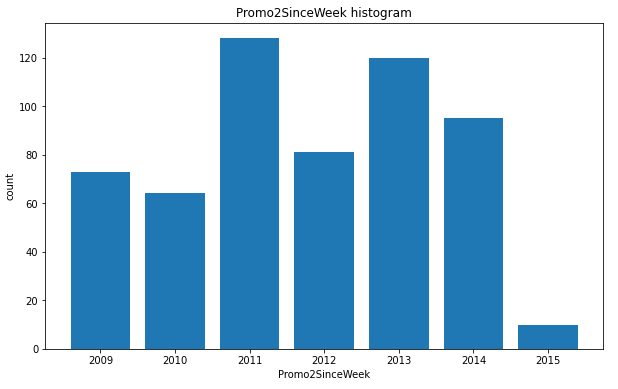  
___
**PromoInterval**

The consecutive intervals Promo2 is started, naming the months the promotion is started anew. If **Promo2** equals 0, this feature is missed. There are 544 missing values. The histogram of values:  
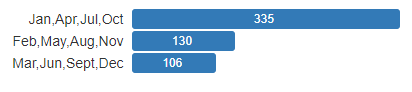  

In [3]:
store[store.CompetitionOpenSinceYear == 1900]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
814,815,a,a,590.0,1.0,1900.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"


In [52]:
profile_store = pandas_profiling.ProfileReport(store)
profile_store.to_file('report store.html')

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# train

In [22]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [43]:
train[train.Open == 0].Sales.value_counts()

0    172817
Name: Sales, dtype: int64

The most of days contains the info about all the shops

In [49]:
train.groupby(by='Date').agg({'Date': 'count'}).rename(columns={'Date': 'Count'}).Count.value_counts()

1115    757
935     184
1114      1
Name: Count, dtype: int64

In [51]:
train.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [56]:
customers = train[train.Open == 1].Customers

In [64]:
log_custs = np.log10(customers + 1)

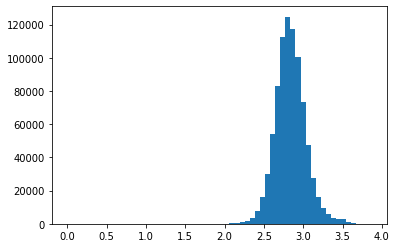

In [98]:
plt.hist(log_custs, bins=60)
plt.show()

In [99]:
sales = train[train.Open == 1].Sales

In [100]:
log_sales = np.log10(sales + 1)

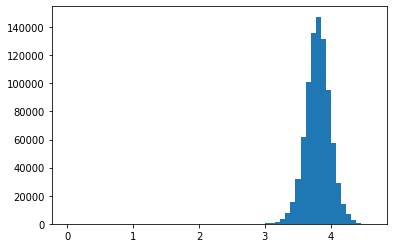

In [101]:
plt.hist(log_sales, bins=60)
plt.show()

In [102]:
log_sales.describe()

count    844392.000000
mean          3.803194
std           0.187145
min           0.000000
25%           3.686636
50%           3.804139
75%           3.922258
max           4.618592
Name: Sales, dtype: float64

In [113]:
train.StateHoliday.apply(str).value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [54]:
profile_train = pandas_profiling.ProfileReport(train)
profile_train.to_file('report train.html')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# test

In [23]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [44]:
test.Open.value_counts()

1.0    35093
0.0     5984
Name: Open, dtype: int64